In [1]:
!pip install opencv-python==4.4.0.42 opencv-contrib-python==4.4.0.42

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 MB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.6/55.6 MB 8.0 MB/s eta 0:00:00
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.6.0.66
    Uninstalling opencv-python-4.6.0.66:
      Successfully uninstalled opencv-python-4.6.0.66
  Attempting uninstall: opencv-contrib-python
    Found existing installation: opencv-contrib-python 4.6.0.66
    Uninstalling opencv-contrib-python-4.6.0.66:
      Successfully uninstalled opencv-contrib-python-4.6.0.66


In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib as mpl
from PIL import Image
mpl.rcParams['figure.dpi'] = 200

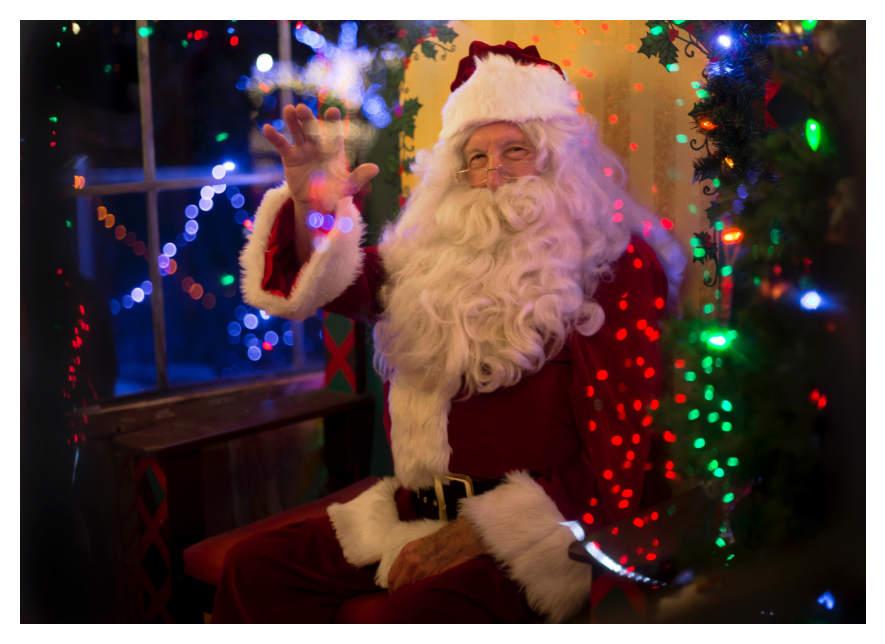

In [5]:
img = cv2.imread('1.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(img)

1.4
3000.0


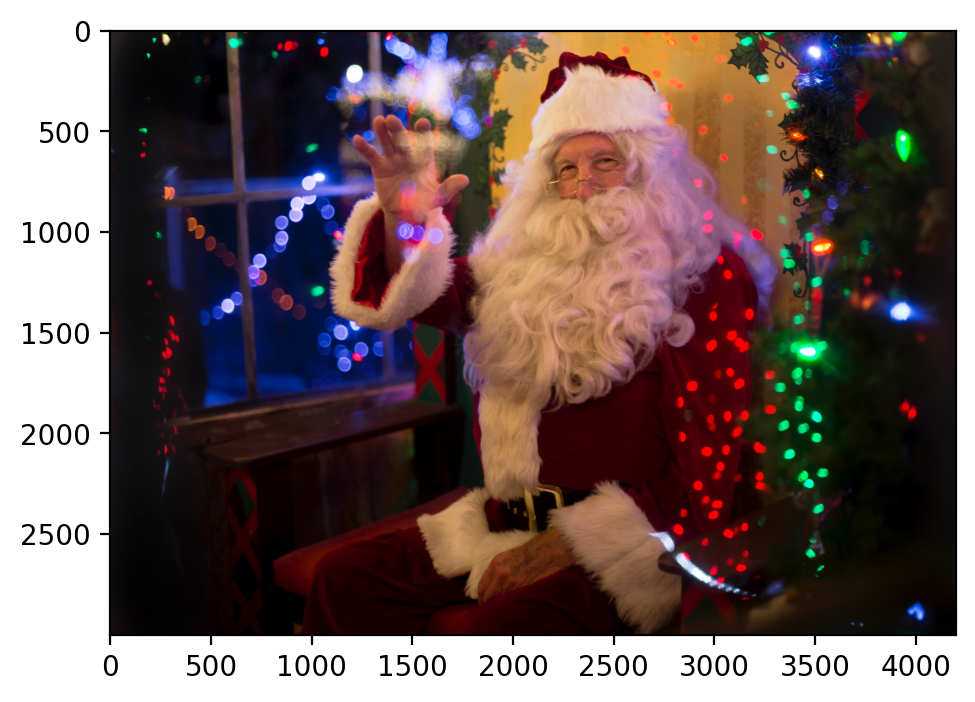

In [6]:
h, w, c = img.shape
new_width = 4200

k = float(w) / h
print(k)
print(new_width/k)
dim = (new_width, int(new_width / k))

resized_img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
plt.imshow(resized_img)
plt.show()

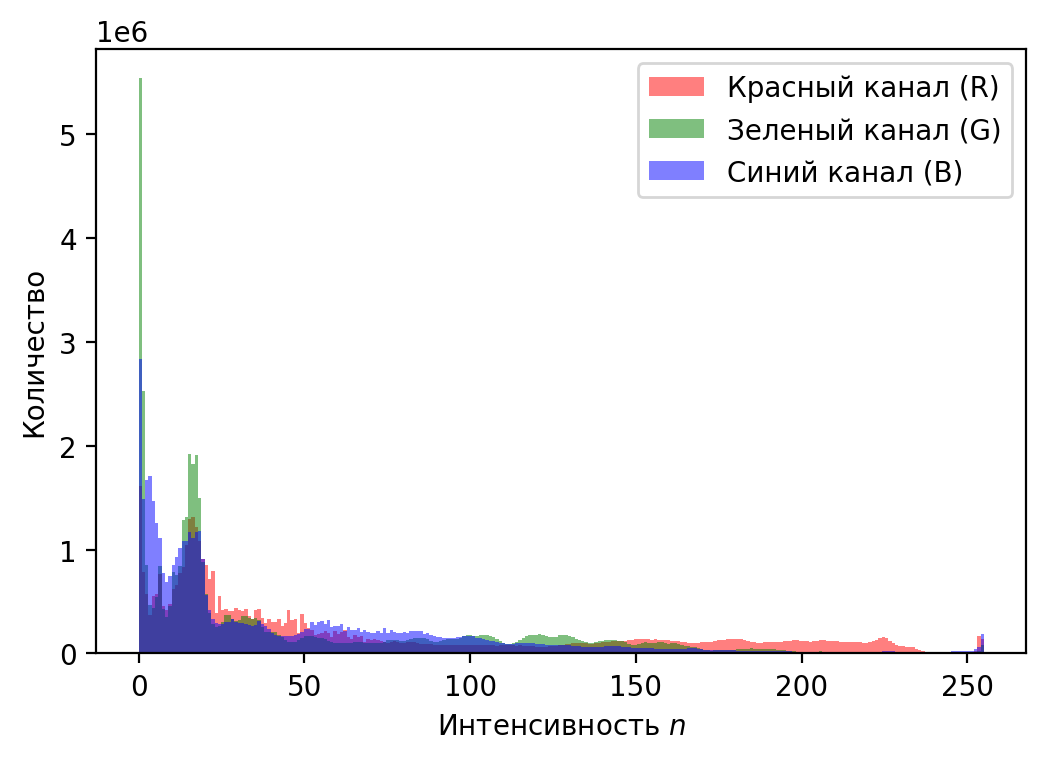

In [7]:
plt.hist(img[:, :, 0].ravel(), bins = 256, color = 'Red', alpha = 0.5)
plt.hist(img[:, :, 1].ravel(), bins = 256, color = 'Green', alpha = 0.5)
plt.hist(img[:, :, 2].ravel(), bins = 256, color = 'Blue', alpha = 0.5)
plt.legend(['Красный канал (R)', 'Зеленый канал (G)', 'Cиний канал (B)'])
plt.xlabel('Интенсивность $n$')
plt.ylabel('Количество')
plt.show()

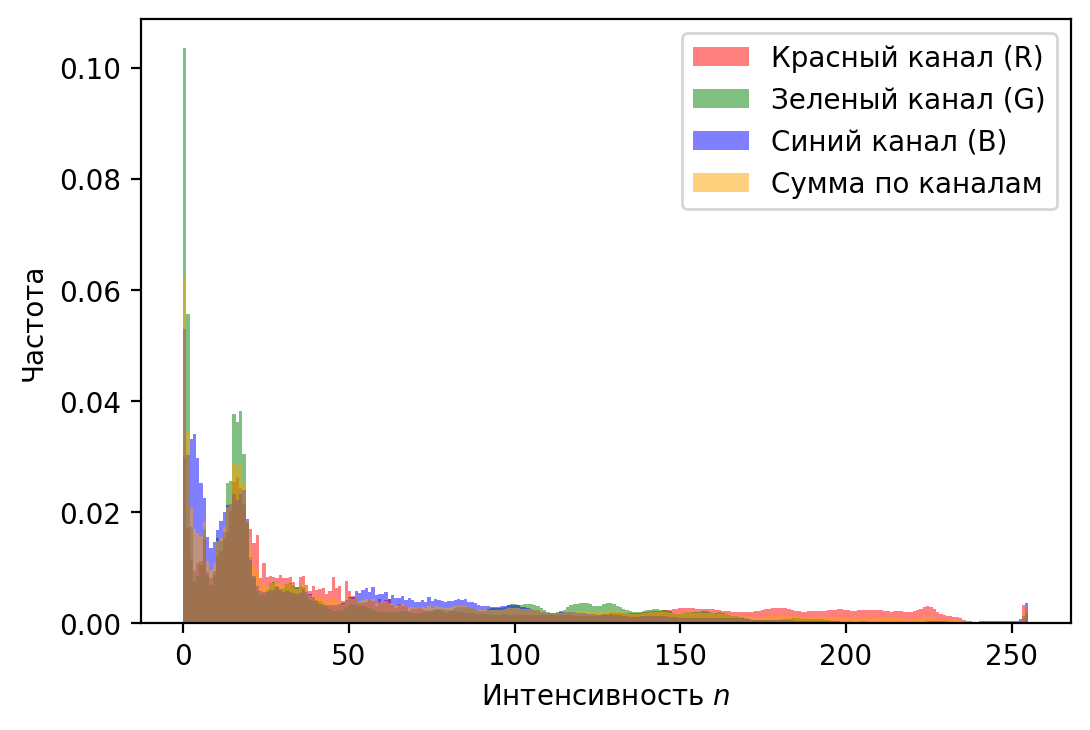

In [10]:
rrr = plt.hist(resized_img[:, :, 0].ravel(), bins = 256, color = 'Red', alpha = 0.5, density=True)
ggg = plt.hist(resized_img[:, :, 1].ravel(), bins = 256, color = 'Green', alpha = 0.5, density=True)
bbb = plt.hist(resized_img[:, :, 2].ravel(), bins = 256, color = 'Blue', alpha = 0.5, density=True)
plt.hist(resized_img.ravel(), bins = 256, color = 'orange', alpha = 0.5, density=True) 
plt.legend(['Красный канал (R)', 'Зеленый канал (G)', 'Cиний канал (B)', 'Сумма по каналам'])
plt.xlabel('Интенсивность $n$')
plt.ylabel('Частота')
plt.show()

In [11]:
import numpy as np

In [13]:
print(np.max(rrr[0]))
print(np.max(ggg[0]))
print(np.max(bbb[0]))

0.02970325054466231
0.10352749953314658
0.05303853096794273


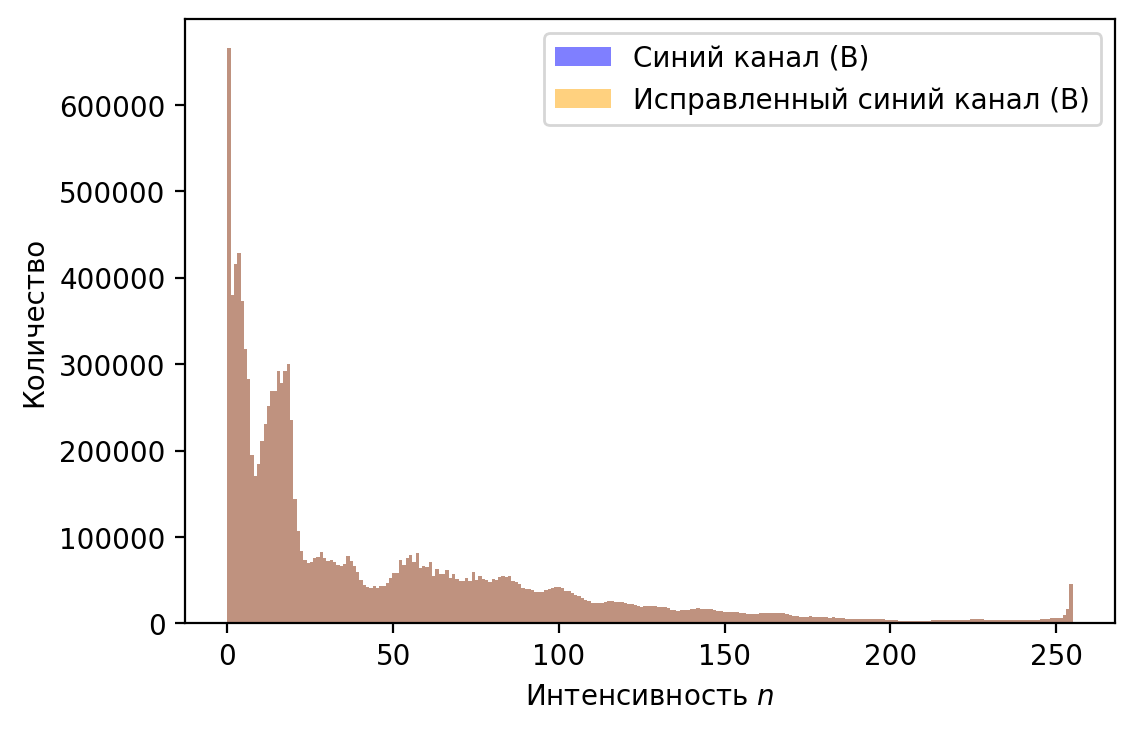

In [14]:
plt.hist(resized_img[:, :, 2].ravel(), bins = 256, color = 'Blue', alpha = 0.5)
plt.xlabel('Интенсивность $n$')
plt.ylabel('Количество')
RGB_img_new = resized_img.copy()
RGB_img_new[:, :, 2] = (RGB_img_new[:, :, 2] - np.min(RGB_img_new[:, :, 2]))/(np.max(RGB_img_new[:, :, 2]) - np.min(RGB_img_new[:, :, 2]))*255
plt.hist(RGB_img_new[:, :, 2].ravel(), bins = 256, color = 'Orange', alpha = 0.5)
plt.legend(['Синий канал (B)', 'Исправленный синий канал (B)'])
plt.show()

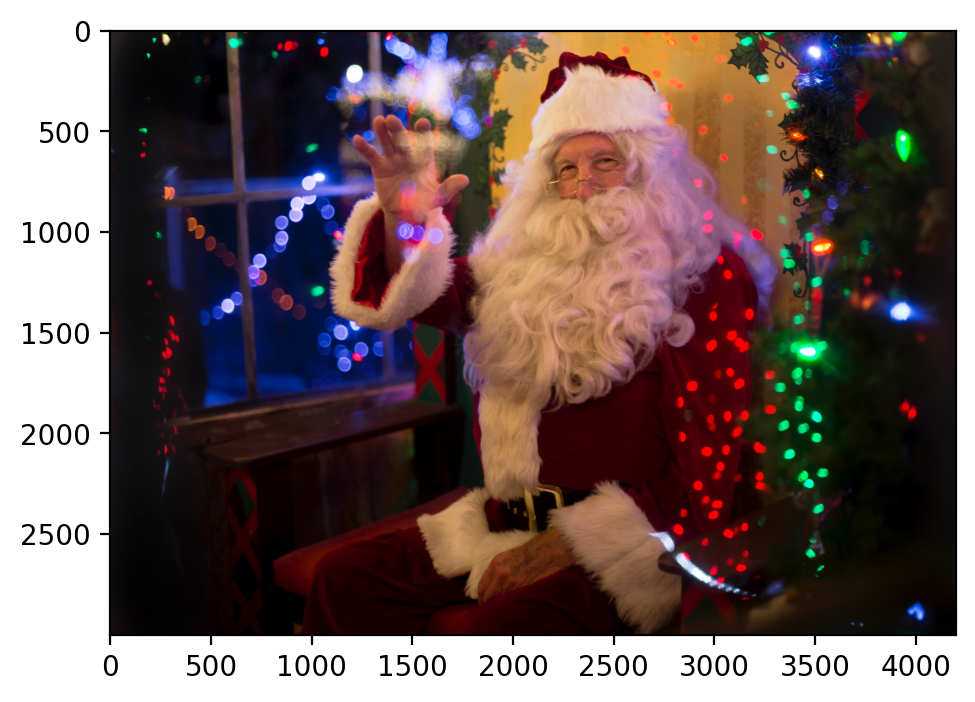

In [15]:
RGB_img_new[:, :, 0] = (RGB_img_new[:, :, 0] - np.min(RGB_img_new[:, :, 0]))/(np.max(RGB_img_new[:, :, 0]) - np.min(RGB_img_new[:, :, 0]))*255
RGB_img_new[:, :, 1] = (RGB_img_new[:, :, 1] - np.min(RGB_img_new[:, :, 1]))/(np.max(RGB_img_new[:, :, 1]) - np.min(RGB_img_new[:, :, 1]))*255
plt.imshow(RGB_img_new)

In [16]:
RGB_img_new[1514, 2064]

array([185, 131,  92], dtype=uint8)

In [17]:
import cv2
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib as mpl
#mpl.rcParams['figure.dpi'] = 300
import pywt
import pywt.data
import numpy as np
from math import sqrt
from PIL import Image, ImageChops, ImageOps
import pickle

In [22]:
image = RGB_img_new
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [23]:
wavelet = 'haar'
c = pywt.dwt2(image,wavelet)
cA, (cH, cV, cD)= c

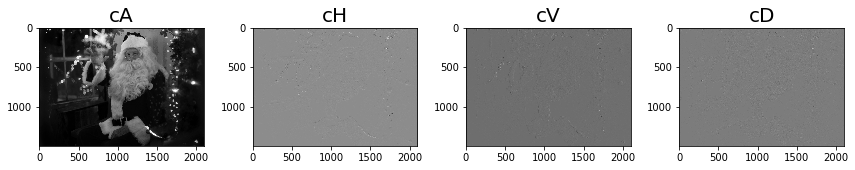

In [24]:
titles = ['cA', 'cH', 'cV', 'cD']
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([cA, cH, cV, cD]):
  ax = fig.add_subplot(1, 4, i + 1)
  ax.imshow(a, interpolation="nearest", cmap = 'gray')
  ax.set_title(titles[i], fontsize=20)
fig.tight_layout()
plt.show()


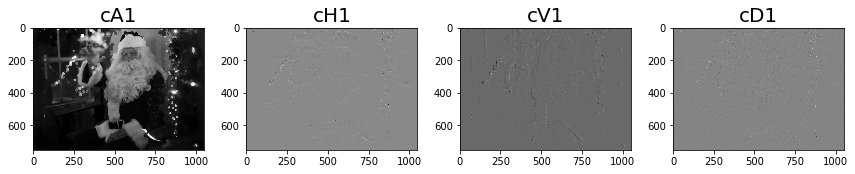

In [25]:
cA1, (cH1, cV1, cD1) = pywt.dwt2(cA,wavelet)
titles = ['cA1', 'cH1', 'cV1', 'cD1']
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([cA1, cH1, cV1, cD1]):
  ax = fig.add_subplot(1, 4, i + 1)
  ax.imshow(a, interpolation="nearest", cmap = 'gray')
  ax.set_title(titles[i], fontsize=20)
fig.tight_layout()
plt.show()

In [26]:
threshold = 110
h1 = cA1.shape[0] # у нас все наборы имеют вид квадратной матрицы
for i in range(h1):
      c[0][i][np.abs(c[0][i])<threshold] = 0.0 # для cA
      for j in range(len(c[1])):
         c[1][j][i][np.abs(c[1][j][i])<threshold] = 0.0  # для cH,cV,cD
print('Количество нулей =',(sum(sum(sum(c[1][m][n] == 0) for n in range(h1)) for m in range(len(c[1])))) + sum(sum(c[0][m] == 0) for m in range(h1)))


Количество нулей = 5493748
